# NOTES

Binary classification : gives 0 or 1 , basically classifies the X in either 1 or 0 (binary)

Remember the formula for one single observation: g(xi) ~ yi


For this we will use the following kaggle dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [296]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt


In [297]:
df = pd.read_csv('data.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [298]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [299]:
# cleaning column names and renaming 

df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
 
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [300]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [301]:
df.totalcharges


0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [302]:
#pd.to_numeric(df.totalcharges) # this will throw error because of some invalid values


In [303]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')
tc

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [304]:
tc.isnull().sum()


np.int64(11)

In [305]:
df[tc.isnull()][['customerid', 'totalcharges']]


,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [306]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
 
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

np.int64(0)

In [307]:
df.churn.head()


0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [308]:
(df.churn == 'yes').astype(int).head()


0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [309]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

#### Scikit learn and splitting

```bash
uv add scikit-learn
```

In [310]:
from sklearn.model_selection import train_test_split

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

df_ftrain, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_ftrain.shape, df_test.shape

((5634, 21), (1409, 21))

In [311]:
# for splitting we do 60 - 20 - 20 , so testing set is already split , now we have to split training set into train and validation
df_train, df_val = train_test_split(df_ftrain, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2 

df_train.shape, df_val.shape

((4225, 21), (1409, 21))

In [312]:
df_ftrain.shape ,df_train.shape, df_val.shape, df_test.shape

((5634, 21), (4225, 21), (1409, 21), (1409, 21))

In [313]:
df_ftrain = df_ftrain.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [314]:
y_full_train = df_ftrain.churn.values
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

## EDA

In [315]:
df_ftrain.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [316]:
df_ftrain.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [317]:
df_ftrain.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [318]:
numerical_vars = df_ftrain.select_dtypes(include=['int64', 'float64'])
categorical_vars = df_ftrain.select_dtypes(include=['object'])

numerical_vars.pop('seniorcitizen')  # this is actually categorical variable
numerical_vars.pop('churn')  # this is target variable
categorical_vars.pop('customerid')  # this is identifier variable

print("Numerical Variables:")
print(numerical_vars.columns)
 
print("\nCategorical Variables:")
print(categorical_vars.columns)

Numerical Variables:
Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

Categorical Variables:
Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'],
      dtype='object')


In [319]:
numerical_vars.nunique()

tenure              73
monthlycharges    1494
totalcharges      5291
dtype: int64

In [320]:
categorical_vars.nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### Risk Ratio  

In [321]:
df_ftrain.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [322]:
df_ftrain[df_ftrain['gender'] == 'male'].churn.mean()

np.float64(0.2632135306553911)

In [323]:
df_ftrain[df_ftrain['gender'] == 'female'].churn.mean()

np.float64(0.27682403433476394)

In [324]:
global_churn_mean = df_ftrain.churn.mean()
global_churn_mean

np.float64(0.26996805111821087)

In [325]:
for col in categorical_vars.columns:
    if col != 'churn' and col!='customerid':  # skip the target column
        print(f"--- {col} ---")
        dfg = df_ftrain.groupby(col).churn.agg(['mean','count'])
        dfg['risk'] = dfg['mean'] / global_churn_mean
        dfg['diff'] = dfg['mean'] - global_churn_mean
        print(dfg)
        print()
        print()
        


--- gender ---
            mean  count      risk      diff
gender                                     
female  0.276824   2796  1.025396  0.006856
male    0.263214   2838  0.974980 -0.006755


--- partner ---
             mean  count      risk      diff
partner                                     
no       0.329809   2932  1.221659  0.059841
yes      0.205033   2702  0.759472 -0.064935


--- dependents ---
                mean  count      risk      diff
dependents                                     
no          0.313760   3968  1.162212  0.043792
yes         0.165666   1666  0.613651 -0.104302


--- phoneservice ---
                  mean  count      risk      diff
phoneservice                                     
no            0.241316    547  0.893870 -0.028652
yes           0.273049   5087  1.011412  0.003081


--- multiplelines ---
                      mean  count      risk      diff
multiplelines                                        
no                0.257407   2700  0.953474

### Mutual Information !

In [326]:
from sklearn.metrics import mutual_info_score

# Exclude 'churn' and 'customerid' from categorical columns
valid_cols = [col for col in categorical_vars if col not in ['churn', 'customerid']]

# Compute mutual information for each categorical column
mi_scores = df_ftrain[valid_cols].apply(
    lambda x: mutual_info_score(x, df_ftrain['churn'])
)

# Sort descending
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)


contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64


### Correlation

In [327]:
df_ftrain[numerical_vars.columns].corrwith(df_ftrain.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

### One Hot encoding

Convert categorical -> numerical


In [328]:
from sklearn.feature_extraction import DictVectorizer

dft_dict = df_ftrain[categorical_vars.columns.tolist() + numerical_vars.columns.tolist()].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(dft_dict)
X_Train = dv.transform(dft_dict)
X_Train


array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.20000e+01, 2.58350e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.20000e+01, 3.16055e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.10000e+01, 4.68175e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.80000e+01, 2.97950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 1.14100e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.60000e+01, 1.11485e+03]], shape=(5634, 44))

### Sigmoid

1/1+exp(-z)

In [329]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

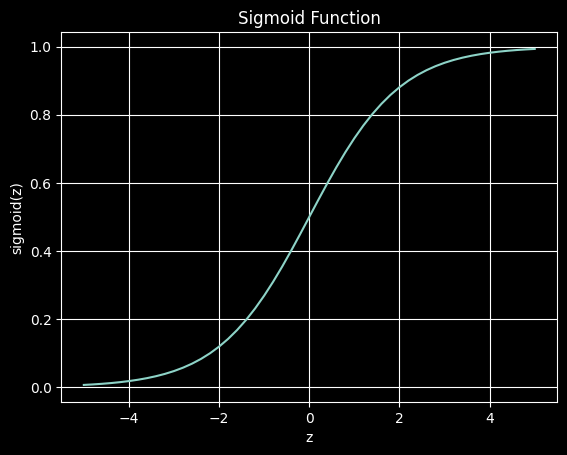

In [330]:
z = np.linspace(-5,5,51)

plt.plot(z, sigmoid(z))
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid()
plt.show()

In [331]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

print(X_Train.shape)
model.fit(X_Train, y_full_train)  # fitting the model

(5634, 44)


/Users/shivamjain/Developer/Learn/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [332]:
model.intercept_[0]

np.float64(-0.13599832166258138)

In [333]:
model.coef_[0].round(3)

array([ 0.495, -0.18 , -0.45 , -0.029, -0.106,  0.044, -0.101, -0.078,
       -0.05 , -0.084, -0.358,  0.325, -0.101,  0.004, -0.221,  0.1  ,
       -0.013,  0.096, -0.101, -0.13 ,  0.213, -0.101, -0.247, -0.217,
        0.082, -0.138,  0.004, -0.098, -0.124,  0.24 , -0.153,  0.1  ,
       -0.235, -0.142, -0.101,  0.108, -0.073, -0.101,  0.039,  0.219,
       -0.101, -0.253, -0.062,  0.   ])

In [334]:
y_pred = model.predict_proba(X_Train)[:,1]
y_pred >= 0.5

array([False, False, False, ...,  True, False, False], shape=(5634,))

In [336]:
# The error occurs because y_pred was computed on X_Train (full train set), but df_val is the validation set. Their lengths do not match.
# To get churn_decision for the validation set, you need to transform df_val and use model.predict_proba on it.
# Example fix:
dval_dict = df_val[categorical_vars.columns.tolist() + numerical_vars.columns.tolist()].to_dict(orient='records')
X_val = dv.transform(dval_dict)
y_pred_val = model.predict_proba(X_val)[:,1]
churn_decision_val = (y_pred_val >= 0.5)
df_val[churn_decision_val].customerid

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 319, dtype: object